In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('Car_sales.csv')

In [5]:
df.drop_duplicates().isnull().sum()

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64

In [6]:
df.isnull().sum().sort_index()

4-year resale value    0
Curb weight            0
Engine size            0
Fuel capacity          0
Fuel efficiency        0
Horsepower             0
Latest Launch          0
Length                 0
Manufacturer           0
Model                  0
Price in thousands     0
Sales in thousands     0
Vehicle type           0
Wheelbase              0
Width                  0
dtype: int64

In [7]:
df.sort_values(by=['Price in thousands'],ascending=[True])

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
33,Chrysler,Town & Country,53.480,19.54,Car,.,.,.,.,.,.,.,.,.,13-Jul-15
129,Saturn,SL,80.620,9.2,Passenger,10.685,1.9,100,102.4,66.4,176.9,2.332,12.1,33,16-Aug-14
140,Toyota,Tacoma,84.087,9.575,Car,11.528,2.4,142,103.3,66.5,178.7,2.58,15.1,23,8-Jan-15
63,Hyundai,Elantra,66.692,7.825,Passenger,11.799,2,140,100.4,66.9,174,2.626,14.5,27,15-Nov-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Porsche,Carrera Cabriolet,1.866,67.55,Passenger,74.97,3.4,300,92.6,69.5,174.5,3.075,17,23,7-Nov-15
95,Mercedes-Benz,SL-Class,3.311,58.6,Passenger,82.6,5,302,99,71.3,177.1,4.125,21.1,20,17-Mar-15
99,Mercedes-Benz,CL500,0.954,.,Passenger,85.5,5,302,113.6,73.1,196.6,4.115,23.2,20,4-Nov-15
26,Chevrolet,Metro,21.855,5.16,Passenger,9.235,1,55,93.1,62.6,149.4,1.895,10.3,45,13-Apr-14


In [8]:
df['Price in thousands'].max()

'9.699'

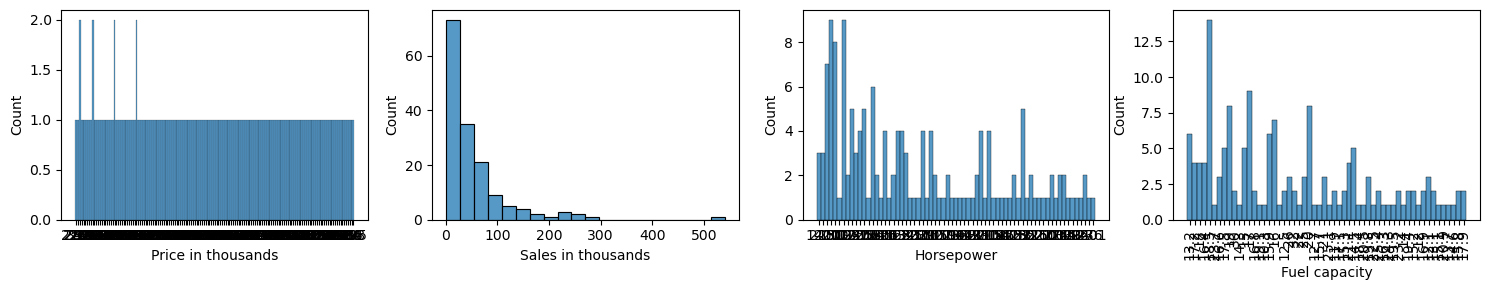

In [9]:
cols = ['Price in thousands','Sales in thousands','Horsepower','Fuel capacity']
fig,axis = plt.subplots(1,4,figsize=(15,3))
axis = axis.flatten()

for i,col in enumerate(cols):
  sns.histplot(data=df,x = col,ax = axis[i],bins=20)
  plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<Axes: xlabel='Length', ylabel='Density'>

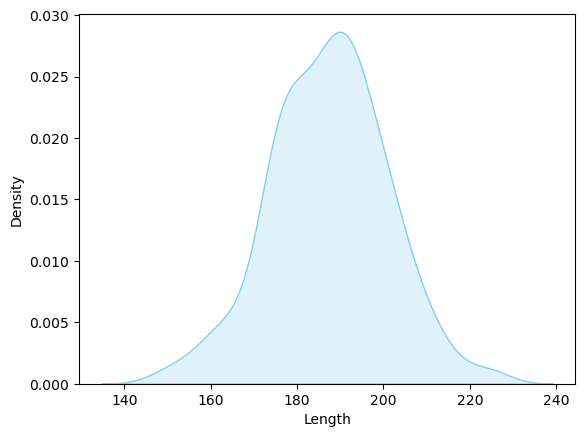

In [10]:
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')

sns.kdeplot(data=df, x='Length', fill=True, color='skyblue')  
# df

In [11]:
df.groupby(by=['Manufacturer']).size()

Manufacturer
Acura             4
Audi              3
BMW               3
Buick             4
Cadillac          5
Chevrolet         9
Chrysler          7
Dodge            11
Ford             11
Honda             5
Hyundai           3
Infiniti          1
Jaguar            1
Jeep              3
Lexus             6
Lincoln           3
Mercedes-Benz     9
Mercury           6
Mitsubishi        7
Nissan            7
Oldsmobile        6
Plymouth          4
Pontiac           6
Porsche           3
Saab              2
Saturn            5
Subaru            2
Toyota            9
Volkswagen        6
Volvo             6
dtype: int64

In [12]:
df.select_dtypes(include=['number']).corr()

,Sales in thousands,Length
Sales in thousands,1.00000,0.25498
Length,0.25498,1.00000


In [13]:
x = df.drop(columns=['Sales in thousands'])
y = df['Sales in thousands']

In [14]:
from sklearn.preprocessing import LabelEncoder

cols = ['Manufacturer','Model']

for col in cols: 
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df[cols]



,Manufacturer,Model
0,0,79
1,0,143
2,0,25
3,0,115
4,1,8
...,...,...
152,29,148
153,29,125
154,29,149
155,29,24


In [15]:
df['Vehicle type'].value_counts()

Vehicle type
Passenger    116
Car           41
Name: count, dtype: int64

In [16]:
# df_encoded = pd.get_dummies(df, columns=['Vehicle type'])
# df_encoded = pd.get_dummies(df['Vehicle type'])

df_encoded = pd.get_dummies(df,columns=['Vehicle type'])
df_encoded

,Manufacturer,Model,Sales in thousands,4-year resale value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch,Vehicle type_Car,Vehicle type_Passenger
0,0,79,16.919,16.36,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14,False,True
1,0,143,39.384,19.875,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15,False,True
2,0,25,14.114,18.225,.,3.2,225,106.9,70.6,192.0,3.47,17.2,26,1-Apr-14,False,True
3,0,115,8.588,29.725,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15,False,True
4,1,8,20.397,22.255,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-Aug-15,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3.545,.,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15,False,True
153,29,125,15.245,.,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14,False,True
154,29,149,17.531,.,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15,False,True
155,29,24,3.493,.,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15,False,True


In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols = df.select_dtypes(include=['number']).columns

s = MinMaxScaler()

df[cols] = s.fit_transform(df[cols])




,Manufacturer,Model,Sales in thousands,Length
0,0.000000,0.509677,0.031102,0.306258
1,0.000000,0.922581,0.072669,0.579228
2,0.000000,0.161290,0.025912,0.567244
3,0.000000,0.741935,0.015687,0.628495
4,0.034483,0.051613,0.037537,0.380826
...,...,...,...,...
152,1.000000,0.954839,0.006356,0.362184
153,1.000000,0.806452,0.028004,0.486019
154,1.000000,0.961290,0.032234,0.490013
155,1.000000,0.154839,0.006260,0.483356
